# Imports 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification, make_regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# KNN (from Scratch)

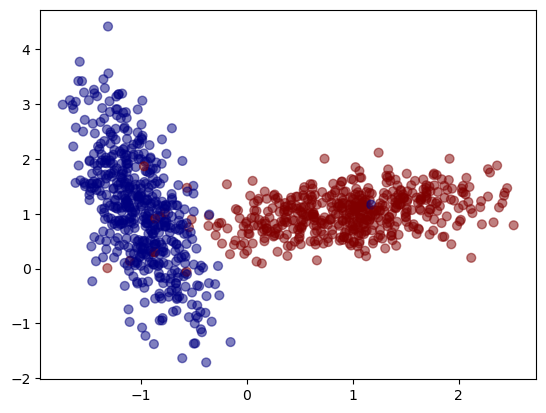

In [2]:
X, y = make_classification(n_samples=2000, n_redundant=0, n_informative=2, n_features=2,
                           n_clusters_per_class=1, class_sep=1, random_state=15)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=19)

plt.scatter(x_train[:, 0], x_train[:, 1], c=y_train, s=40, cmap='jet', alpha=0.5)
# plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test, s=40, cmap='jet', marker='s')

In [3]:
from scipy.stats import mode
from scipy.spatial.distance import mahalanobis
from sklearn.utils.extmath import weighted_mode

In [4]:
class KNN:
    def __init__(self, k, metric='euclidean'):
        self.k = k
        self.metric = metric
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        self.inv_cov = np.linalg.inv(np.cov(X.T))
        
    def predict(self, x):
        y_hats = []
        for xi in x:
            if self.metric == 'euclidean':
                distances = np.linalg.norm(self.X - x, axis=1)
            elif self.metric == 'mahalanobis':
                distances = np.array([mahalanobis(xi, Xi, self.inv_cov) for Xi in self.X])
            
            indices = np.argsort(distances)[:self.k]
            k_nearest_labels = self.y[indices]
            
            k_nearest_distances = distances[indices]
            weights = self.calculate_weights(k_nearest_distances)
            
            y_hat, _ = weighted_mode(k_nearest_labels, weights)
            y_hats.append(y_hat[0])
            
        return np.array(y_hats)            
            
    def calculate_weights(self, distances, const=0.01):
        weights = 1 / (distances + const)
        return weights            

In [5]:
model = KNN(10, 'mahalanobis')
model.fit(x_train, y_train)

In [6]:
y_hat = model.predict(x_test)

In [ ]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

yf = model.predict(Xf)
ym = yf.reshape(xm1.shape)

plt.contourf(xm1, xm2, ym, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, s=10, cmap='jet', edgecolors='w')

# Advancements in KNN (KD-Tree, Ball-Tree)

- query_point = np.array([[0, 0]]): This line is creating a 2D numpy array with a single point at the origin (0,0). This point is what we’re going to use as the reference for our k-NN query.
- _, ind = kdt.query(query_point, k=7): This line is performing the k-NN query on the KDTree kdt that was previously constructed with the dataset X. The query() function takes two arguments: the point(s) to use as the reference for the query (query_point in this case), and the number of nearest neighbors to return (k=7 in this case).
- The function returns two values: The first value (denoted by _ because it’s being ignored) is an array of the distances to the nearest neighbors. The second value ind is an array of the indices of these neighbors in the original dataset X.

In [48]:
from sklearn.neighbors import KDTree, BallTree

### KD-Tree

In [27]:
X, y = make_classification(n_samples=200, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

In [34]:
# bt = BallTree(X, leaf_size=10)
kdt = KDTree(X, leaf_size=10)

query_point = np.array([[0, 0]])
_, ind = kdt.query(query_point, k=5)

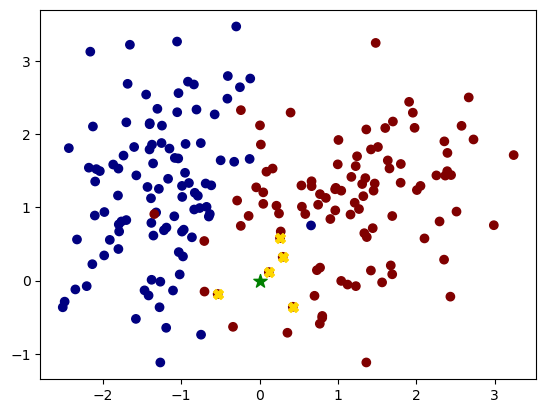

In [35]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet') 

plt.scatter(query_point[0, 0], query_point[0, 1], marker='*', color='green', s=100)

plt.scatter(X[ind, 0], X[ind, 1], marker='X', color='gold', s=50)

In [36]:
X, y = make_classification(n_samples=2000, n_features=2, n_informative=2, n_redundant=0,
                           n_clusters_per_class=1, n_classes=2, class_sep=1.2, random_state=15)

In [37]:
kdt = KDTree(X)

In [38]:
dmin, dmax = 0.5, 0.5
xmin, xmax = X.min(0)-dmin, X.max(0)+dmax
x1 = np.linspace(xmin[0], xmax[0], 500)
x2 = np.linspace(xmin[1], xmax[1], 500)
xm1, xm2 = np.meshgrid(x1, x2)
xf1, xf2 = xm1.flatten(), xm2.flatten()
Xf = np.stack((xf1, xf2), axis=1)

In [21]:
_, ind = kdt.query(Xf, k=5)
labels = mode(y[ind], axis=1, keepdims=False).mode
labels = labels.reshape(xm1.shape)

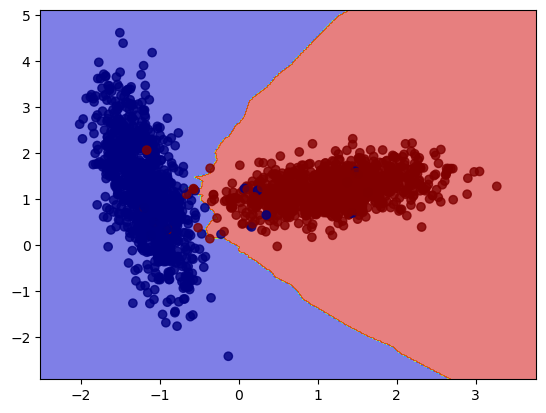

In [22]:
plt.contourf(xm1, xm2, labels, alpha=0.5, cmap='jet')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='jet', alpha=0.8)